#Traffic Sign Recognition

###Downloading dataset

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

100%|██████████| 612M/612M [00:04<00:00, 160MB/s]


###Importing Libraries

In [4]:
#Setting tensorflow GPU
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

###Preparing & Preprocessing Data

In [6]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [7]:
for i in range(classes):
  path = os.path.join(cur_path,'gtsrb-german-traffic-sign/train/',str(i))
  images = os.listdir(path)

  for a in images:
    try:
      image = Image.open(path + '/' + a).resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print("Error loading image")

In [8]:
data = np.array(data)
labels = np.array(labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


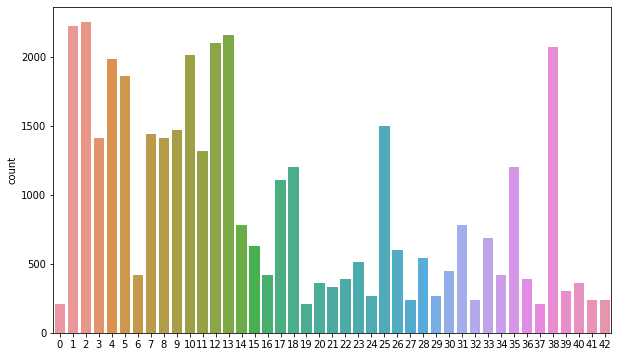

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(labels)

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
data, labels = shuffle(data, labels, random_state=0)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [13]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

###Building a CNN model

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

###Train and validate the model

In [17]:
early_stopping = EarlyStopping(monitor='accuracy',patience=10)

In [18]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_data = (x_test, y_test), callbacks = [early_stopping])

Epoch 1/50
981/981 [==============================] - 20s 10ms/step - loss: 1.8334 - accuracy: 0.5436 - val_loss: 0.4280 - val_accuracy: 0.8931
Epoch 2/50
981/981 [==============================] - 5s 6ms/step - loss: 0.6654 - accuracy: 0.8076 - val_loss: 0.2165 - val_accuracy: 0.9459
Epoch 3/50
981/981 [==============================] - 5s 5ms/step - loss: 0.4498 - accuracy: 0.8680 - val_loss: 0.1210 - val_accuracy: 0.9675
Epoch 4/50
981/981 [==============================] - 5s 5ms/step - loss: 0.3594 - accuracy: 0.8943 - val_loss: 0.1330 - val_accuracy: 0.9670
Epoch 5/50
981/981 [==============================] - 5s 5ms/step - loss: 0.3086 - accuracy: 0.9107 - val_loss: 0.0969 - val_accuracy: 0.9731
Epoch 6/50
981/981 [==============================] - 5s 5ms/step - loss: 0.2800 - accuracy: 0.9192 - val_loss: 0.0757 - val_accuracy: 0.9759
Epoch 7/50
981/981 [==============================] - 5s 5ms/step - loss: 0.2663 - accuracy: 0.9250 - val_loss: 0.1073 - val_accuracy: 0.9755
Epoc

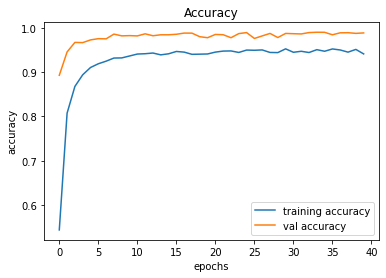

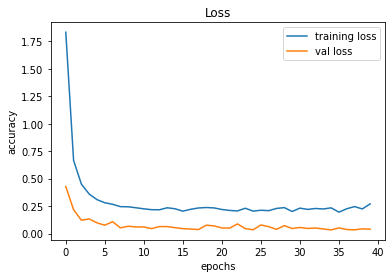

In [19]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

###Test our model with test dataset

In [20]:
test = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')

In [21]:
labels = test['ClassId'].values
imgs = test['Path'].values

In [22]:
os.chdir('/content/gtsrb-german-traffic-sign/')

In [23]:
dt_test = []

for a in imgs:
  image = Image.open(a).resize((30,30))
  dt_test.append(np.array(image))

In [24]:
dt_test = np.array(dt_test)

In [25]:
pred = model.predict(dt_test)

In [26]:
y_pred = np.argmax(pred,axis = 1) 
y_true = labels 
confusion_mtx = confusion_matrix(y_true, y_pred)

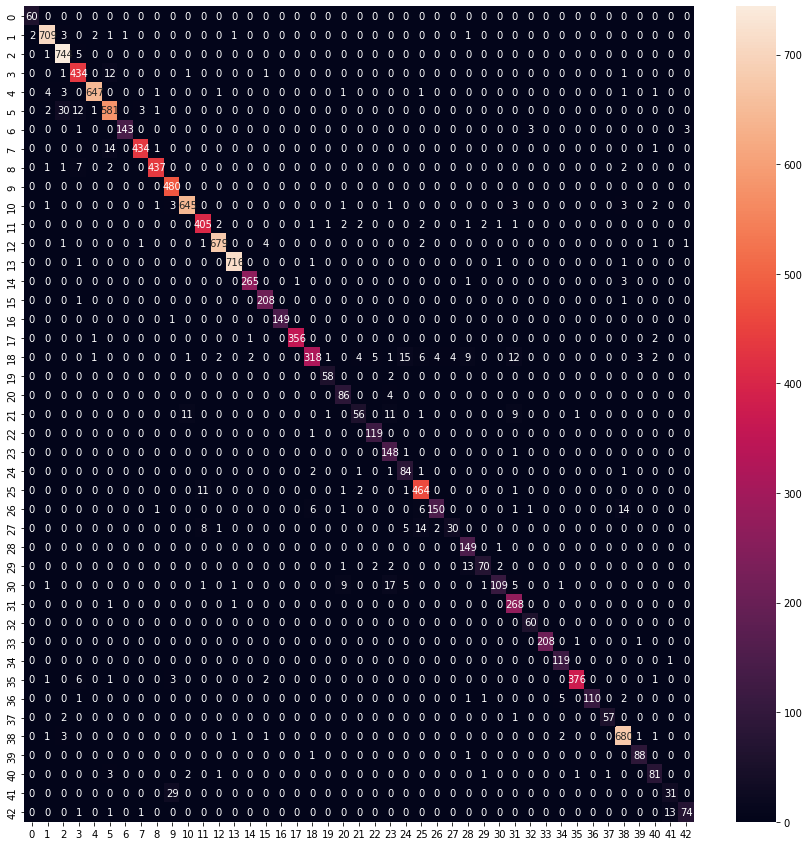

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [28]:
acc = sum(confusion_mtx.diagonal())/confusion_mtx.sum()
acc*100

95.6848772763262

In [29]:
model.save('/content/traffic_classifier.h5')